### Esercitazione 8

#### Studio della funzione d’onda fondamentale tramite il Principio Variazionale

Il principio variazionale della Meccanica Quantistica stabilisce che il valor medio dell’Hamiltoniano su uno stato quantistico di prova fornisce un limite inferiore all’energia dello stato fondamentale:

$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$

Nel presente studio è stato affrontato il problema variazionale per una particella quantistica in una dimensione spaziale, soggetta al potenziale esterno:

$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Trattandosi di un sistema non risolvibile analiticamente, l’approccio adottato è stato completamente numerico. È stata impiegata una funzione d’onda di prova parametrizzata:

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}} + e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

Questa funzione d’onda dipende da due parametri variazionali, $\sigma$ e $\mu$. Per campionare la distribuzione di probabilità $|\Psi_T^{\sigma,\mu}(x)|^2$ è stato implementato un algoritmo Monte Carlo variazionale che utilizza il metodo di Metropolis con probabilità di transizione uniforme  $T(x_{\text{new}}|x_{\text{old}})$.

Attraverso la tecnica del data blocking è stato calcolato il valor medio dell’energia variazionale:

$$
\langle {\hat H} \rangle_T = \int dx \, \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \, \frac{\hat{H} \Psi_T(x)}{\Psi_T(x)}
$$

dove è stato necessario calcolare analiticamente la derivata seconda della funzione d’onda per ottenere l’energia cinetica:

$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$


#### Ottimizzazione variazionale con Simulated Annealing

Per determinare i parametri ottimali $\sigma$ e $\mu$ che minimizzano $\langle \hat{H} \rangle_T$, il codice Monte Carlo è stato esteso mediante un algoritmo di **Simulated Annealing (SA)**. 

È stata scelta una temperatura iniziale sufficientemente alta per consentire l’esplorazione del paesaggio energetico e una legge di raffreddamento geometrico per ridurre progressivamente la temperatura $T_{i+1}=0.95 T_i$. 

Ad ogni passo è stato calcolato il valor medio dell’Hamiltoniano con sufficiente statistica per evidenziare la riduzione dell’energia.

In figura è riportato il comportamento di $\langle \hat{H} \rangle_T$ in funzione dei passi dell’algoritmo di Simulated Annealing, con le relative incertezze statistiche.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
 
H=[]
Hb=[]

H=np.loadtxt("../OUTPUT/Risultati.dat",max_rows=6000)
err=np.loadtxt("../OUTPUT/Risultati.dat",skiprows=6000)

mu1=np.loadtxt("../OUTPUT/Mu.dat",max_rows=2000)
mu2=np.loadtxt("../OUTPUT/Mu.dat",skiprows=2000,max_rows=4000)
mu3=np.loadtxt("../OUTPUT/Mu.dat",skiprows=4000)

sigma1=np.loadtxt("../OUTPUT/Sigma.dat",max_rows=2000)
sigma2=np.loadtxt("../OUTPUT/Sigma.dat",skiprows=2000,max_rows=4000)
sigma3=np.loadtxt("../OUTPUT/Sigma.dat",skiprows=4000)


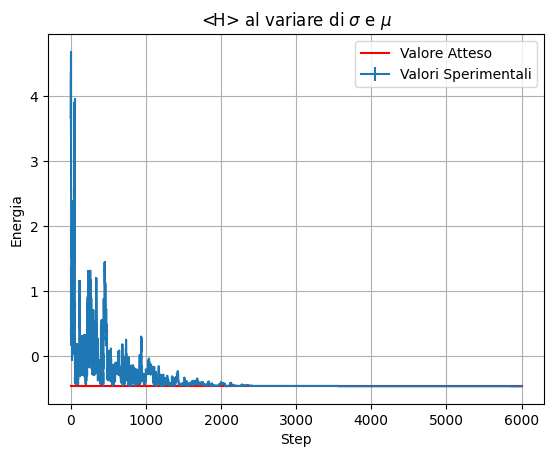

In [2]:

# Grafico H per step

x=np.linspace(0,6000,60)
plt.errorbar(range(0,6000),H,yerr=err,label="Valori Sperimentali")
plt.plot(x, [-0.46]*len(x), color="red", label="Valore Atteso")

plt.grid()
plt.title("<H> al variare di $\sigma$ e $\mu$")
plt.xlabel("Step")
plt.legend()
plt.ylabel("Energia")
plt.show()
plt.close()

Un’ulteriore rappresentazione è stata prodotta per evidenziare il percorso seguito dall’algoritmo nello spazio dei parametri variazionali $\mu,\sigma$:

In figura vi è la traiettoria nel piano dei parametri $\mu, \sigma$, in funzione dei passi di SA.

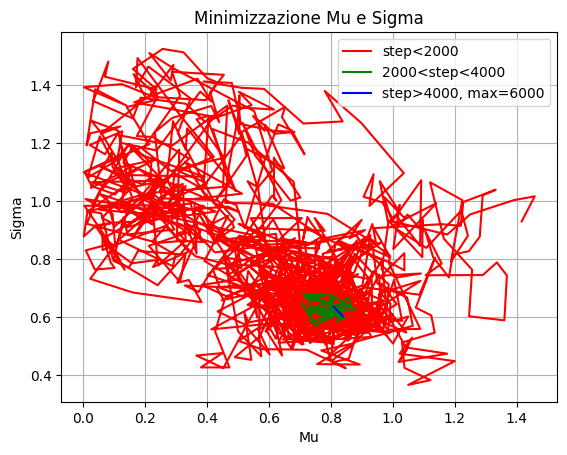

In [3]:
# Grafico andamento di mu e sigma 

plt.plot(mu1,sigma1,color="red",label="step<2000")
plt.plot(mu2,sigma2,color="green",label="2000<step<4000")
plt.plot(mu3,sigma3,color="blue",label="step>4000, max=6000")


plt.grid()
plt.title("Minimizzazione Mu e Sigma")
plt.xlabel("Mu")
plt.ylabel("Sigma")
plt.legend()
plt.show()
plt.close()

#### Validazione dei risultati ottimizzati

Al termine dell’ottimizzazione, per il set di parametri che minimizza $\langle \hat{H} \rangle_T$, è stata effettuata un’analisi dell’incertezza statistica in funzione del numero di blocchi:

La figura seguente mostra l’energia variazionale e la relativa incertezza statistica come funzione del numero di blocchi per i parametri ottimali trovati.



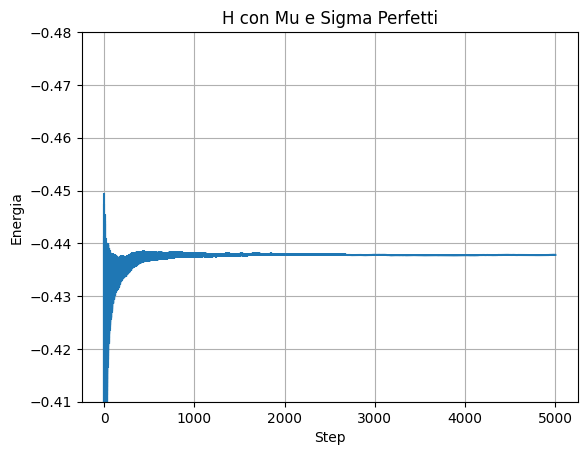

In [ ]:
#Grafico H con mu e sigma best

dati2=np.loadtxt("../OUTPUT/BestH.dat",delimiter=",")
Hb=dati2[:,0]
err=dati2[:,1]
x=np.linspace(0,5000,60)
plt.errorbar(range(0,5000),Hb,yerr=err,label="Valori Sperimentali")
plt.grid()
plt.title("H con Mu e Sigma Perfetti")
plt.xlabel("N blocchi")
plt.ylim(-0.41,-0.48)
plt.ylabel("Energia")
plt.show()
plt.close()


Infine, è stata confrontata la distribuzione di probabilità $|\Psi_T(x)|^2$ campionata con quella analitica.

In figura è riportato l’istogramma dei campioni generati $|\Psi_T(x)|^2$, confrontato con la curva analitica della funzione di densità 

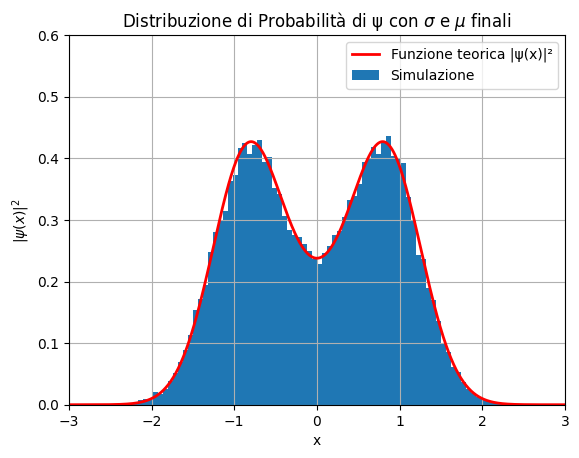

In [5]:
# Distrib di Probabilità

psi2=np.loadtxt("../OUTPUT/ModuleSquare.dat")

x_min=-3.0
x_max=3.0
n_bins=len(psi2)
bin_width=(x_max-x_min)/n_bins

def Psi2Real(x,mu,sigma):
    term1=np.exp(-((x-mu)**2)/(2*sigma**2))
    term2=np.exp(-((x+mu)**2)/(2*sigma**2))
    psi=term1+term2
    return psi**2

x_dense = np.linspace(x_min, x_max, 1000)
psi2_th = Psi2Real(x_dense, mu3[-1], sigma3[-1])
psi2_th /= np.trapz(psi2_th, x_dense)  

x=np.linspace(x_min+bin_width/2,x_max-bin_width/2,n_bins)
psi2_density=psi2/(np.sum(psi2)*bin_width)
plt.bar(x, psi2_density, width=bin_width, align='center',label="Simulazione")
plt.plot(x_dense, psi2_th, 'r-', lw=2, label='Funzione teorica |ψ(x)|²')
plt.grid()
plt.title("Distribuzione di Probabilità di ψ con $\sigma$ e $\mu$ finali")
plt.xlabel("x")
plt.legend()
plt.ylim(0,0.6)
plt.ylabel(r"$|\psi(x)|^2$")
plt.xlim(-3, 3)
plt.show()
plt.close()
